In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


## Get Datasets

In [13]:
FF=pd.read_csv('1. Features_and_targets\df_fan_feature.csv')
FP=pd.read_csv('1. Features_and_targets\df_pump_feature.csv')
FS=pd.read_csv('1. Features_and_targets\df_slider_feature.csv')
FV=pd.read_csv('1. Features_and_targets\df_valve_feature.csv')
TF=pd.read_csv('1. Features_and_targets\df_fan_target.csv')
TP=pd.read_csv('1. Features_and_targets\df_pump_target.csv')
TS=pd.read_csv('1. Features_and_targets\df_slider_target.csv')
TV=pd.read_csv('1. Features_and_targets\df_valve_target.csv')
Fall=pd.read_csv('1. Features_and_targets\df_all_features.csv')
Tall=pd.read_csv('1. Features_and_targets\df_all_targets.csv')
Machine=pd.read_csv('1. Features_and_targets\mach_type.csv')

## Same as "2. BalancedRandomForest.ipynb"

In [17]:
def split(F, T):
    X_train , X_test, y_train, y_test  = train_test_split( F, T.values.ravel(), random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)
    return X_train, y_train, X_test, y_test, X_val, y_val

#For all
X_train_all, y_train_all, X_test_all, y_test_all, X_val_all, y_val_all=split(Fall, Tall)
#For FAN
X_train_fan, y_train_fan, X_test_fan, y_test_fan, X_val_fan, y_val_fan=split(FF, TF)
#For VALVE
X_train_valve, y_train_valve, X_test_valve, y_test_valve, X_val_valve, y_val_valve=split(FV, TV)
#For PUMP
X_train_pump, y_train_pump, X_test_pump, y_test_pump, X_val_pump, y_val_pump=split(FP, TP)
#For SLIDER
X_train_slider, y_train_slider, X_test_slider, y_test_slider, X_val_slider, y_val_slider=split(FS, TS)




In [30]:
def Balanced_RF(a, b, c, d, e, f): # a, b= Training sets / c,d = testing sets / e, f = validation sets
    model = BalancedRandomForestClassifier(n_estimators=200)
    model.fit(a, b)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores= cross_val_score(model, c, d, scoring='roc_auc', cv=cv, n_jobs=-1)
    y_pred = model.predict(c)
    y_pred_val = model.predict(e)
    return model, y_pred, y_pred_val

model_all, y_pred_all, y_pred_val_all=Balanced_RF(X_train_all, y_train_all, X_test_all, y_test_all, X_val_all, y_val_all)
model_fan, y_pred_fan, y_pred_val_fan=Balanced_RF(X_train_fan, y_train_fan, X_test_fan, y_test_fan, X_val_fan, y_val_fan)
model_valve, y_pred_valve, y_pred_val_valve=Balanced_RF(X_train_valve, y_train_valve, X_test_valve, y_test_valve, X_val_valve, y_val_valve)
model_pump, y_pred_pump, y_pred_val_pump=Balanced_RF(X_train_pump, y_train_pump, X_test_pump, y_test_pump, X_val_pump, y_val_pump)
model_slider, y_pred_slider, y_pred_val_slider=Balanced_RF(X_train_slider, y_train_slider, X_test_slider, y_test_slider, X_val_slider, y_val_slider)

## ALL

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test_all, y_pred_all).ravel()
specificity = tn / (tn+fp)
tn, fp, fn, tp, specificity

(1405, 250, 647, 6753, 0.8489425981873112)

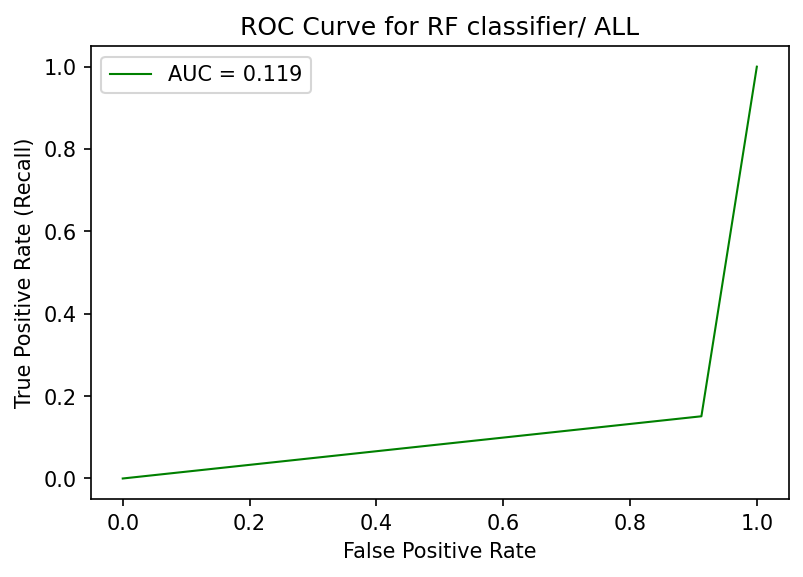

In [27]:
fpr, tpr, thresholds = roc_curve(y_test_all, y_pred_all, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier/ ALL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Feature: 0, Score: 0.02915
Feature: 1, Score: 0.02779
Feature: 2, Score: 0.04072
Feature: 3, Score: 0.03012
Feature: 4, Score: 0.02049
Feature: 5, Score: 0.04247
Feature: 6, Score: 0.02878
Feature: 7, Score: 0.03369
Feature: 8, Score: 0.02639
Feature: 9, Score: 0.02391
Feature: 10, Score: 0.02449
Feature: 11, Score: 0.03042
Feature: 12, Score: 0.02236
Feature: 13, Score: 0.04205
Feature: 14, Score: 0.03229
Feature: 15, Score: 0.04375
Feature: 16, Score: 0.03119
Feature: 17, Score: 0.02029
Feature: 18, Score: 0.04927
Feature: 19, Score: 0.05744
Feature: 20, Score: 0.05022
Feature: 21, Score: 0.02578
Feature: 22, Score: 0.04861
Feature: 23, Score: 0.05317
Feature: 24, Score: 0.05983
Feature: 25, Score: 0.01418
Feature: 26, Score: 0.02790
Feature: 27, Score: 0.02989
Feature: 28, Score: 0.03336


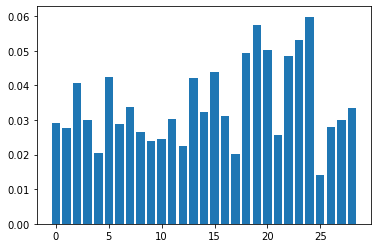

In [28]:
#### Importance
importance_all = model_all.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_all):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_all))], importance_all)
plt.show()

## FAN

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test_fan, y_pred_fan).ravel()
specificity = tn / (tn+fp)
tn, fp, fn, tp, specificity

(641, 93, 148, 1907, 0.8732970027247956)

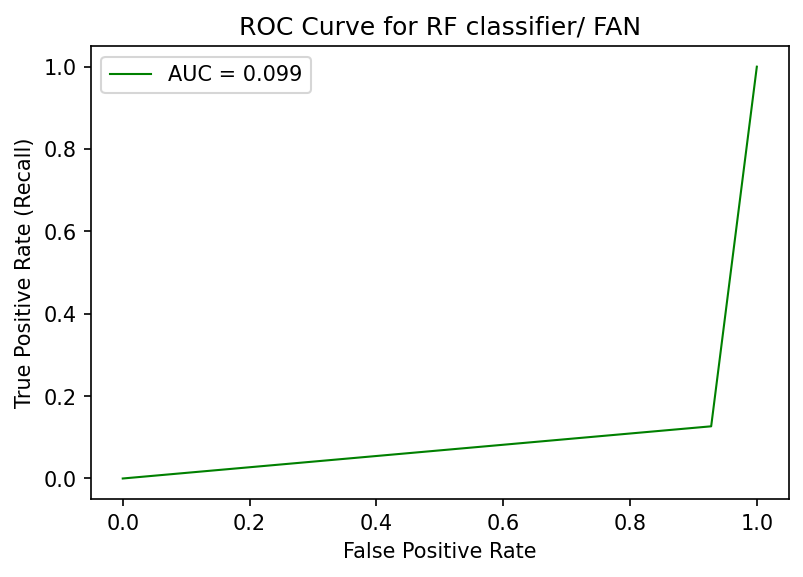

In [32]:

fpr, tpr, thresholds = roc_curve(y_test_fan, y_pred_fan, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier/ FAN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Feature: 0, Score: 0.03380
Feature: 1, Score: 0.03894
Feature: 2, Score: 0.05349
Feature: 3, Score: 0.05116
Feature: 4, Score: 0.01143
Feature: 5, Score: 0.06518
Feature: 6, Score: 0.04390
Feature: 7, Score: 0.06082
Feature: 8, Score: 0.03637
Feature: 9, Score: 0.02444
Feature: 10, Score: 0.02753
Feature: 11, Score: 0.04307
Feature: 12, Score: 0.02570
Feature: 13, Score: 0.02165
Feature: 14, Score: 0.03246
Feature: 15, Score: 0.01494
Feature: 16, Score: 0.00788
Feature: 17, Score: 0.02123
Feature: 18, Score: 0.02039
Feature: 19, Score: 0.07334
Feature: 20, Score: 0.01960
Feature: 21, Score: 0.03778
Feature: 22, Score: 0.04492
Feature: 23, Score: 0.07676
Feature: 24, Score: 0.01855
Feature: 25, Score: 0.01124
Feature: 26, Score: 0.01878
Feature: 27, Score: 0.03826
Feature: 28, Score: 0.02639


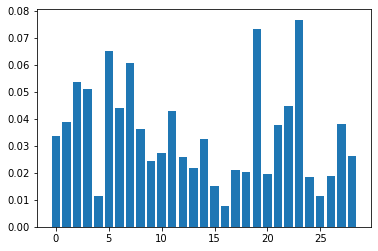

In [33]:
#### Importance
importance_fan = model_fan.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_fan):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_fan))], importance_fan)
plt.show()

## VALVE

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test_valve, y_pred_valve).ravel()
specificity = tn / (tn+fp)
tn, fp, fn, tp, specificity

(202, 44, 161, 1688, 0.8211382113821138)

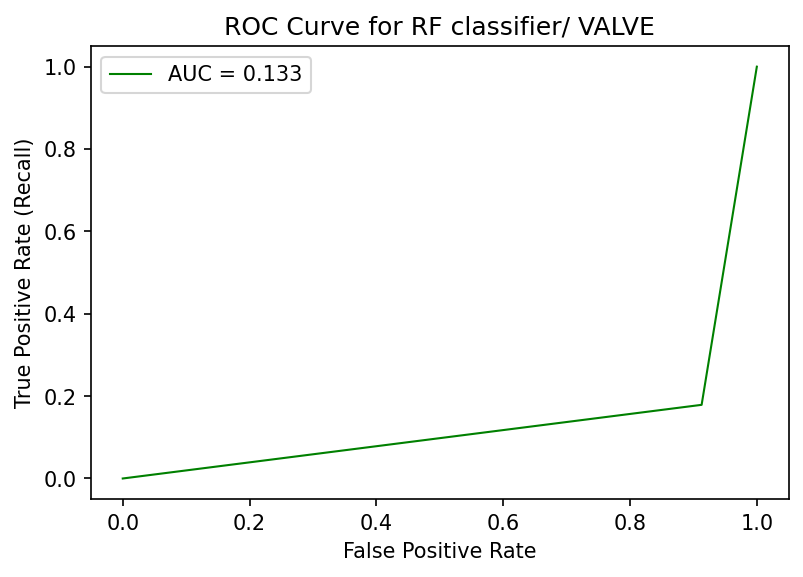

In [35]:
fpr, tpr, thresholds = roc_curve(y_test_valve, y_pred_valve, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier/ VALVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Feature: 0, Score: 0.01278
Feature: 1, Score: 0.01329
Feature: 2, Score: 0.01322
Feature: 3, Score: 0.01283
Feature: 4, Score: 0.02804
Feature: 5, Score: 0.02700
Feature: 6, Score: 0.01902
Feature: 7, Score: 0.02039
Feature: 8, Score: 0.01725
Feature: 9, Score: 0.01366
Feature: 10, Score: 0.01834
Feature: 11, Score: 0.01655
Feature: 12, Score: 0.01398
Feature: 13, Score: 0.04754
Feature: 14, Score: 0.01591
Feature: 15, Score: 0.02814
Feature: 16, Score: 0.02631
Feature: 17, Score: 0.01550
Feature: 18, Score: 0.15774
Feature: 19, Score: 0.03633
Feature: 20, Score: 0.11908
Feature: 21, Score: 0.01789
Feature: 22, Score: 0.08010
Feature: 23, Score: 0.02617
Feature: 24, Score: 0.08272
Feature: 25, Score: 0.01295
Feature: 26, Score: 0.04426
Feature: 27, Score: 0.01359
Feature: 28, Score: 0.04940


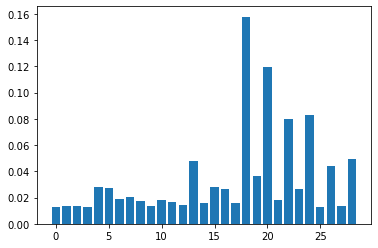

In [36]:
#### Importance
importance_valve = model_valve.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_valve):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_valve))], importance_valve)
plt.show()

## PUMP

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test_pump, y_pred_pump).ravel()
specificity = tn / (tn+fp)
tn, fp, fn, tp, specificity

(197, 51, 241, 1624, 0.7943548387096774)

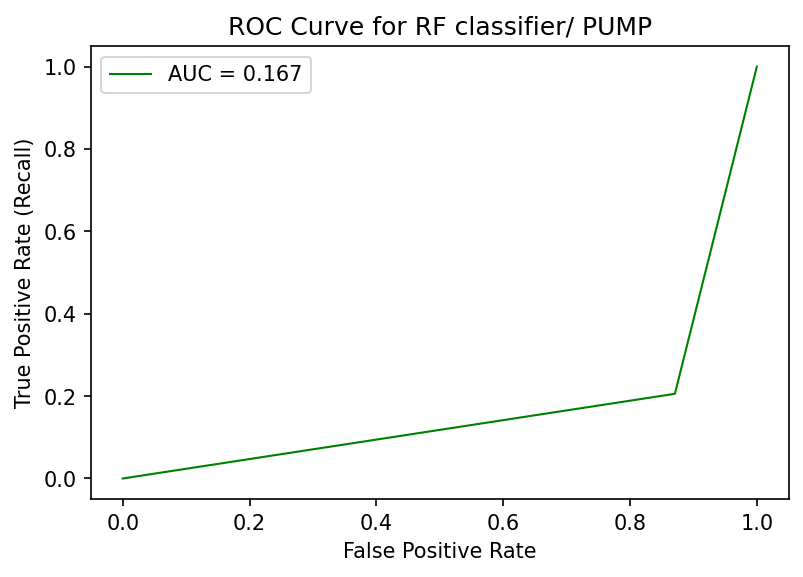

In [38]:
fpr, tpr, thresholds = roc_curve(y_test_pump, y_pred_pump, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier/ PUMP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


Feature: 0, Score: 0.02702
Feature: 1, Score: 0.02443
Feature: 2, Score: 0.03553
Feature: 3, Score: 0.02636
Feature: 4, Score: 0.02087
Feature: 5, Score: 0.02814
Feature: 6, Score: 0.02073
Feature: 7, Score: 0.02249
Feature: 8, Score: 0.02296
Feature: 9, Score: 0.02726
Feature: 10, Score: 0.01782
Feature: 11, Score: 0.02689
Feature: 12, Score: 0.02401
Feature: 13, Score: 0.04322
Feature: 14, Score: 0.02645
Feature: 15, Score: 0.09993
Feature: 16, Score: 0.02449
Feature: 17, Score: 0.02136
Feature: 18, Score: 0.05976
Feature: 19, Score: 0.04526
Feature: 20, Score: 0.07133
Feature: 21, Score: 0.02504
Feature: 22, Score: 0.04624
Feature: 23, Score: 0.03665
Feature: 24, Score: 0.05059
Feature: 25, Score: 0.02391
Feature: 26, Score: 0.02620
Feature: 27, Score: 0.04094
Feature: 28, Score: 0.03412


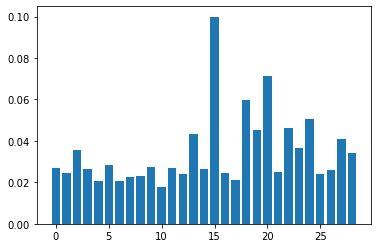

In [39]:
#### Importance
importance_pump = model_pump.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_pump):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_pump))], importance_pump)
plt.show()

## SLIDER

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test_slider, y_pred_slider).ravel()
specificity = tn / (tn+fp)
tn, fp, fn, tp, specificity

(429, 40, 84, 1504, 0.9147121535181236)

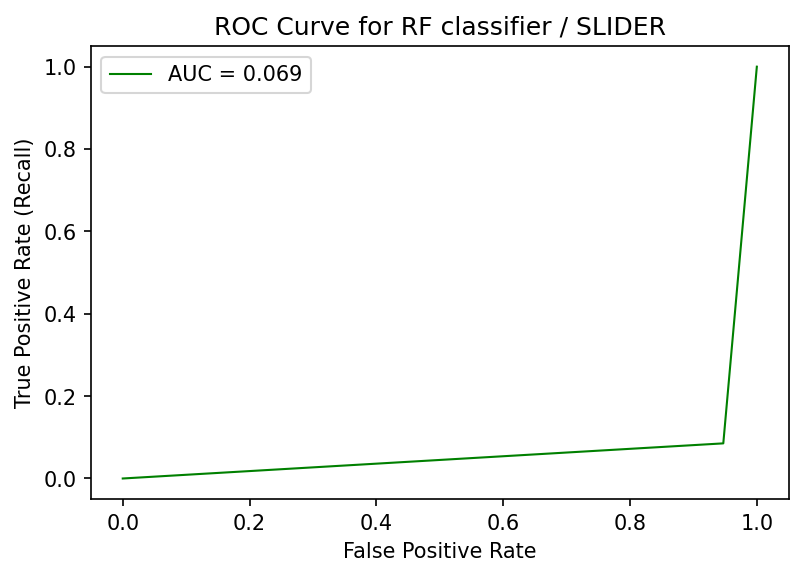

In [41]:
fpr, tpr, thresholds = roc_curve(y_test_slider, y_pred_slider, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier / SLIDER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Feature: 0, Score: 0.01919
Feature: 1, Score: 0.01067
Feature: 2, Score: 0.02294
Feature: 3, Score: 0.01345
Feature: 4, Score: 0.03714
Feature: 5, Score: 0.03392
Feature: 6, Score: 0.01630
Feature: 7, Score: 0.02047
Feature: 8, Score: 0.01409
Feature: 9, Score: 0.04129
Feature: 10, Score: 0.01630
Feature: 11, Score: 0.02120
Feature: 12, Score: 0.01192
Feature: 13, Score: 0.07471
Feature: 14, Score: 0.06743
Feature: 15, Score: 0.06732
Feature: 16, Score: 0.04101
Feature: 17, Score: 0.01062
Feature: 18, Score: 0.02792
Feature: 19, Score: 0.04217
Feature: 20, Score: 0.10427
Feature: 21, Score: 0.01212
Feature: 22, Score: 0.02990
Feature: 23, Score: 0.03130
Feature: 24, Score: 0.08320
Feature: 25, Score: 0.00820
Feature: 26, Score: 0.03425
Feature: 27, Score: 0.05357
Feature: 28, Score: 0.03310


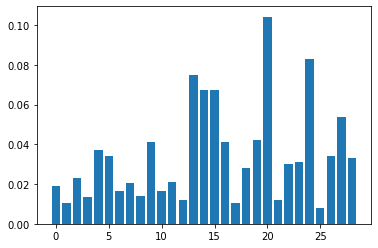

In [42]:
#### Importance
importance_slider = model_slider.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_slider):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_slider))], importance_slider)
plt.show()